In [1]:
from pywarpx import picmi
from icecream import ic
import yt
import unyt
from yt import derived_field
yt.enable_parallelism()

# # %%
# @derived_field(name="density_e", sampling_type="local",display_name=r"\rho_e",units="cm**-3")
# def _density_e(field, data):
#     return data['openPMD','rho-electron']/ unyt.qe

# @derived_field(name="density_p", sampling_type="local",units="cm**-3")
# def _density_p(field, data):
#     return data['openPMD','rho-proton']/unyt.qp

# @derived_field(name="density", sampling_type="local",units="cm**-3")
# def _density(field, data):
#     return data['openPMD','rho-proton']/unyt.qp - data['openPMD','rho-electron']/unyt.qe

False

In [2]:
def _index(field, data):
    return (
        data["particle_id"]
    )

yt.add_field(
    ('all',"particle_index"),
    function=_index,
    sampling_type="local",
)

In [3]:
plotfile = 'diags/plotfiles/plt??????'
ts = yt.load(plotfile)

ds = ts[0]
ad=  ds.all_data()
ic(ds.particle_types,
    ds.particle_type_counts,
    ds.domain_width,
    # ds.field_list,
    # ds.derived_field_list,
)
for f in ds.field_list:
    if 'all' in f or 'nbody' in f: continue
    fv = ad[f]
    if fv.size == 0: continue
    ic(f, fv.min(), fv.max(),fv.mean())

# ad.get_bbox()
# ds.print_stats()

yt : [INFO     ] 2022-05-20 06:33:23,400 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-05-20 06:33:23,401 Parameters: domain_dimensions         = [128 256   1]
yt : [INFO     ] 2022-05-20 06:33:23,402 Parameters: domain_left_edge          = [     0.         -63647.09434703      0.        ]
yt : [INFO     ] 2022-05-20 06:33:23,402 Parameters: domain_right_edge         = [6.36470943e+04 6.36470943e+04 1.00000000e+00]
/home/zijin/mambaforge/envs/warpx/lib/python3.10/site-packages/yt/fields/field_detector.py:108: VisibleDeprecationWarning: The requested field name 'particle_id' is ambiguous and corresponds to any one of the following field types:
 {'all', 'proton', 'nbody'}
Please specify the requested field as an explicit tuple (ftype, fname).
Defaulting to '("all", "particle_id")'.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  finfo = self.ds._get_field_info(*field)
ic| ds.particle_types: ('electron', 'proton', 'all', 'nbody')
    ds.particle_type_

In [5]:
fields = ["particle_velocity_x", "particle_velocity_y", "particle_velocity_z"]
indices = ad[('all', 'particle_index')].astype("int")
ic(indices)
trajs = ts.particle_trajectories(indices, fields=fields, suppress_logging=True)

/home/zijin/mambaforge/envs/warpx/lib/python3.10/site-packages/yt/data_objects/data_containers.py:1421: VisibleDeprecationWarning: The requested field name 'particle_id' is ambiguous and corresponds to any one of the following field types:
 {'all', 'proton', 'nbody'}
Please specify the requested field as an explicit tuple (ftype, fname).
Defaulting to '("all", "particle_id")'.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  finfo = self.ds._get_field_info(field)
ic| indices: unyt_array([3372624, 3372623, 3372622, ..., 1950939, 1950938, 1950937], '(dimensionless)')


YTFieldNotFound: Could not find field ('all', 'particle_position_z') in plt000000.
Did you mean:
	('all', 'particle_position_x')
	('all', 'particle_position_y')

In [69]:
ps = 'proton'
ds.index
ds.field_info[ps,'particle_momentum_x'].take_log = False
ds.field_info[ps,'particle_momentum_y'].take_log = False
# p=  yt.ParticlePlot( ds, (ps,'particle_position_x'), (ps,'particle_position_y'), (ps,'particle_momentum_y'))
# p =  yt.ParticlePlot(ds, (ps,'particle_position_x'), (ps,'particle_momentum_y'), (ps,'particle_weight'))
# p.show()
x_field = (ps,'particle_momentum_x')
y_field = (ps,'particle_momentum_y')
z_fields = (ps,'particle_weight')

name = "{}_{}_2d-Profile_{}_{}_{}}".format(str(ds))
middle = "2d-Profile_{xfn}_{yfn}_{_f}"

p =  yt.ParticlePlot(ds, x_field, y_field , z_fields)
p.save()
# ps = 'electron'
# p =  yt.ParticlePlot(ds, (ps,'particle_momentum_x'), (ps,'particle_momentum_y'), (ps,'particle_weight'))
# p.show()

ValueError: Unsupported file format 'proton.png'

yt : [INFO     ] 2022-05-19 19:30:57,221 Found 0 iterations in directory
yt : [WARNING  ] 2022-05-19 19:30:57,222 No iterations found!
yt : [INFO     ] 2022-05-19 19:30:57,268 Parameters: current_time              = 0.03182205083746362
yt : [INFO     ] 2022-05-19 19:30:57,268 Parameters: domain_dimensions         = [256. 128.   1.]
yt : [INFO     ] 2022-05-19 19:30:57,269 Parameters: domain_left_edge          = [-63647.09434703      0.              0.        ]
yt : [INFO     ] 2022-05-19 19:30:57,270 Parameters: domain_right_edge         = [6.36470943e+04 6.36470943e+04 1.00000000e+00]
yt : [INFO     ] 2022-05-19 19:30:57,270 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2022-05-19 19:30:58,703 Profiled field ('electron', 'particle_mass') has no positive values. Max = 0.000000.
yt : [WARNING  ] 2022-05-19 19:30:58,703 Switching to linear colorbar scaling.



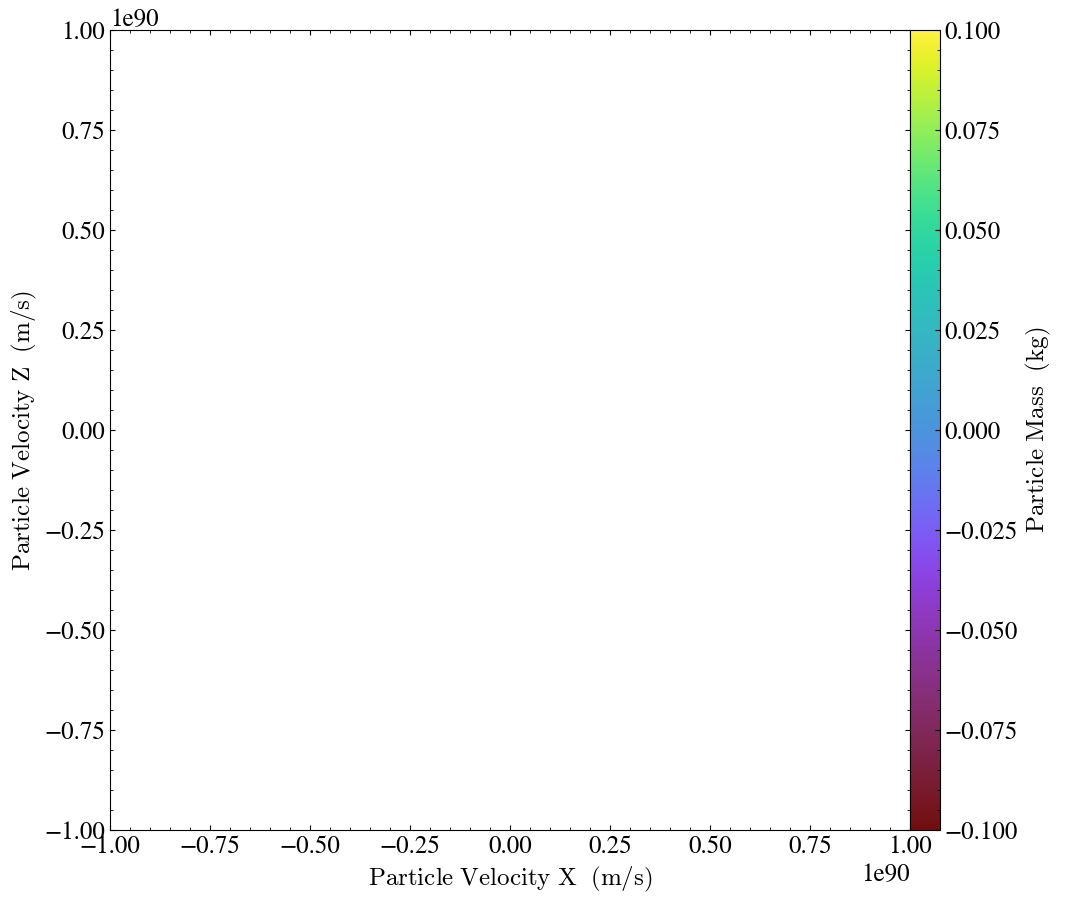

In [21]:
diag_name = 'openpmd_'
plotfile = './diags/diag2/*.h5'.format(diag_name)
ts = yt.load(plotfile)
ds = ts[-1]
p=  yt.ParticlePhasePlot( ds.all_data(), ('electron','particle_velocity_x'), ('electron','particle_velocity_z'), ('electron','particle_mass'))
p.show()

yt : [INFO     ] 2022-05-19 18:26:56,377 xlim = -63647.094347 63647.094347
yt : [INFO     ] 2022-05-19 18:26:56,377 ylim = 0.000000 63647.094347
yt : [INFO     ] 2022-05-19 18:26:56,378 xlim = -63647.094347 63647.094347
yt : [INFO     ] 2022-05-19 18:26:56,378 ylim = 0.000000 63647.094347
yt : [INFO     ] 2022-05-19 18:26:56,379 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2022-05-19 18:26:56,390 Making a fixed resolution buffer of (('gas', 'density_e')) 800 by 800
yt : [INFO     ] 2022-05-19 18:26:56,397 Making a fixed resolution buffer of (('gas', 'density_p')) 800 by 800
yt : [WARNING  ] 2022-05-19 18:26:56,421 Plotting ('gas', 'density'): Both positive and negative values. Min = -0.05096609257687026 cm**(-3), Max = 0.05455788910517017 cm**(-3).
yt : [WARNING  ] 2022-05-19 18:26:56,421 Switching to symlog colorbar scaling.
yt : [WARNING  ] 2022-05-19 18:26:56,501 Plotting ('gas', 'density_p'): Both positive and negative values. Min = 0.0 cm**(


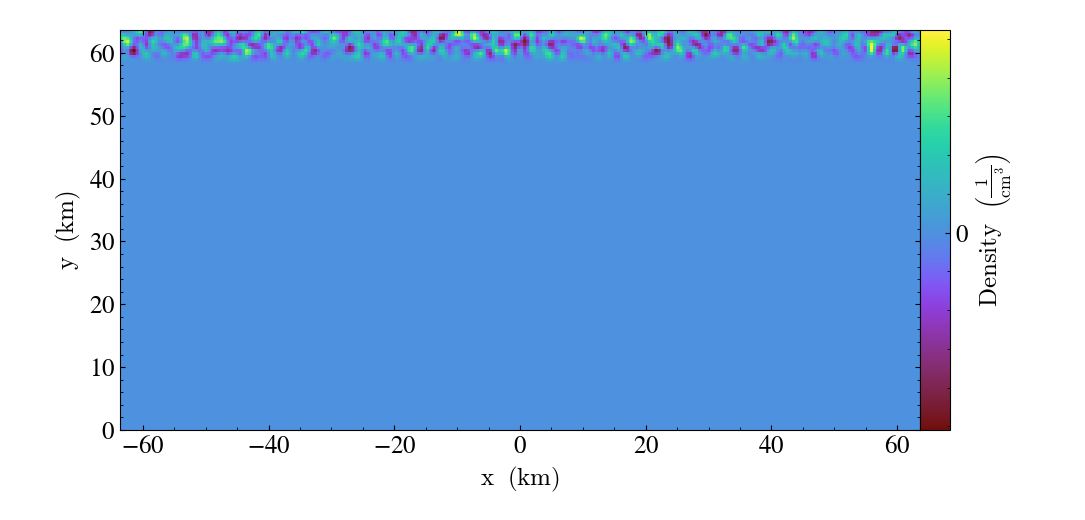
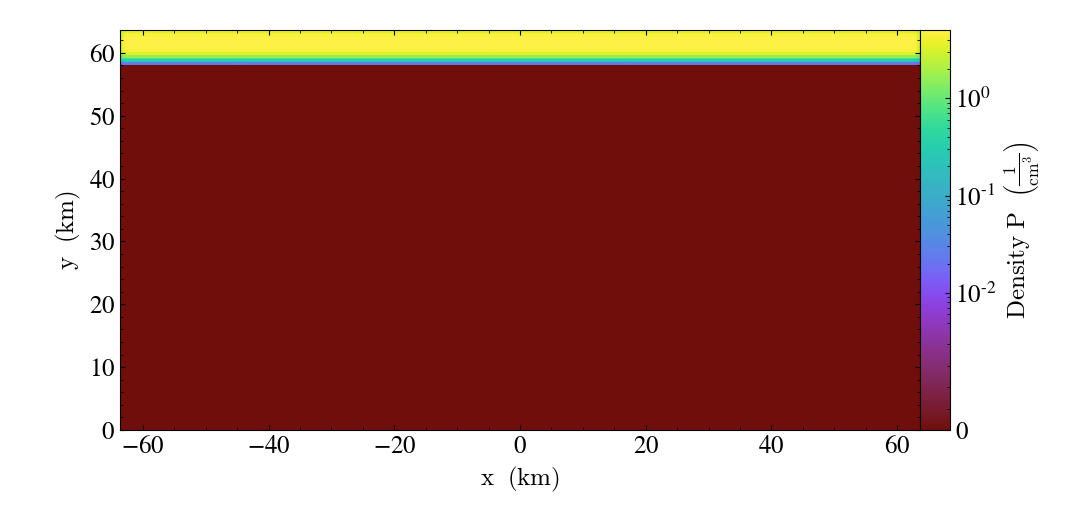
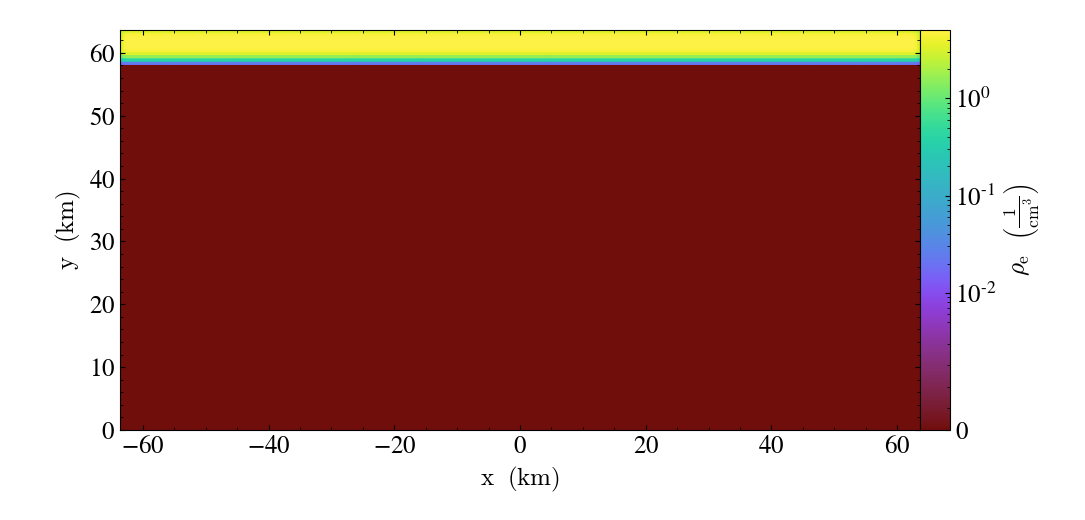

In [5]:
slc = yt.SlicePlot(ds, "z", [('gas', 'density_e'),('gas', 'density_p') ,('gas', 'density') ] ,origin="native")
slc.show()

In [1]:
from pywarpx import picmi
import yt
yt.enable_parallelism()

def _density_e(field, data):
    from pywarpx import picmi
    q_e = picmi.constants.q_e
    
    return - data['boxlib','rho_e-']/q_e

yt.add_field(
    "density_e",
    function=_density_e,
    sampling_type="local",
)

# %%
diag_name = 'plt'
plotfile = './diags/plotfiles/{}??????'.format(diag_name)
ts = yt.load(plotfile)

from pathlib import Path

subdirectories = ["figures"]
for path in subdirectories:
    Path(path).mkdir(parents=True, exist_ok=True)

# %%
_check = 1
if _check:
    from icecream import ic
    ds = ts[0]
    ic(ds.time_unit)
    ic(ds.current_time)
    ic(ds.derived_field_list)

yt : [INFO     ] 2022-05-19 11:25:33,156 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-05-19 11:25:33,157 Parameters: domain_dimensions         = [128 256   1]
yt : [INFO     ] 2022-05-19 11:25:33,158 Parameters: domain_left_edge          = [     0.         -63647.09434703      0.        ]
yt : [INFO     ] 2022-05-19 11:25:33,158 Parameters: domain_right_edge         = [6.36470943e+04 6.36470943e+04 1.00000000e+00]
ic| ds.time_unit: unyt_quantity(1., 's')
ic| ds.current_time: unyt_quantity(0., 'code_time')
ic| ds.derived_field_list: [('all', 'particle_cpu'),
                            ('all', 'particle_id'),
                            ('all', 'particle_momentum_x'),
                            ('all', 'particle_momentum_y'),
                            ('all', 'particle_momentum_z'),
                            ('all', 'particle_position_x'),
                            ('all', 'particle_position_y'),
                            ('all', 'particle_weight'),
       